# Importing the Mega database created from the 4 DBs and Importing libiraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
mega_DB = pd.read_csv('/content/drive/MyDrive/WithNicolas/SoulPred/mega_dataset_cured.csv')

In [ ]:
mega_DB

,SMILES,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,O=C1Nc2cccc3cccc1c23,-3.254767,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,Clc1ccc(C=O)cc1,-2.177078,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10374,CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@...,-1.420000,590.586,-0.0345,143.5146,42.0,13.0,7.0,15.0,4.0,228.0,1.0,3.0,4.0,5.0,234.24,239.625001,9.521048e-07,1392.080754
10375,CCC(N)Cc1c[nH]c2ccccc12.CC(O)=O,-2.570000,248.326,2.5386,73.5789,18.0,2.0,3.0,4.0,3.0,98.0,2.0,0.0,0.0,2.0,79.11,106.813358,3.567857e-07,501.218230
10376,[Na+].[O-]C(=O)Cc1c(Cl)ccc(Cl)c1Cl,-3.080000,261.467,-1.0568,50.1830,14.0,2.0,0.0,6.0,2.0,70.0,1.0,0.0,0.0,1.0,40.13,118.440242,1.690000e-06,354.684783
10377,O.O.O.O.O.CN1CC[C@]23[C@H]4Oc5c(O)ccc(C[C@@H]1...,-3.280000,473.497,-3.5782,109.8230,31.0,6.0,4.0,14.0,0.0,182.0,1.0,1.0,4.0,5.0,285.03,178.236157,0.000000e+00,883.343327


In [ ]:
# print the shape of the DB to make sure we imported the right one

mega_DB.shape

(10379, 19)

# Dealing with outliers



In [ ]:
mega_DB.corr()

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
Solubility,1.000000,-0.372457,-0.610332,-0.428347,-0.356604,0.039828,0.195304,-0.042715,-0.220507,-0.349796,-0.341499,-0.048752,-0.097663,-0.333562,0.111323,-0.354291,0.044628,-0.294056
MolWt,-0.372457,1.000000,0.272850,0.919415,0.950094,0.726497,0.300775,0.777295,0.602588,0.945689,0.562731,0.177917,0.265054,0.619251,0.651518,0.972594,-0.353925,0.860867
MolLogP,-0.610332,0.272850,1.000000,0.485908,0.330195,-0.253684,-0.275746,-0.240405,0.397257,0.352652,0.248707,-0.004929,0.019651,0.208519,-0.381093,0.278662,0.195908,0.197334
MolMR,-0.428347,0.919415,0.485908,1.000000,0.974640,0.616489,0.273028,0.576839,0.690781,0.973598,0.605930,0.190281,0.277652,0.661609,0.496524,0.956821,-0.275231,0.853120
HeavyAtomCount,-0.356604,0.950094,0.330195,0.974640,1.000000,0.736449,0.340188,0.709533,0.650577,0.992961,0.615098,0.215498,0.306196,0.687891,0.637649,0.983175,-0.327956,0.901969
NumHAcceptors,0.039828,0.726497,-0.253684,0.616489,0.736449,1.000000,0.498413,0.888141,0.392765,0.719083,0.431186,0.167093,0.223597,0.488198,0.900377,0.734266,-0.296715,0.739474
NumHDonors,0.195304,0.300775,-0.275746,0.273028,0.340188,0.498413,1.000000,0.453053,0.173608,0.348211,0.124491,0.213052,0.214506,0.241183,0.635429,0.300981,-0.112402,0.300240
NumHeteroatoms,-0.042715,0.777295,-0.240405,0.576839,0.709533,0.888141,0.453053,1.000000,0.329754,0.691909,0.427390,0.087548,0.144613,0.432420,0.884140,0.739453,-0.303138,0.732610
NumRotatableBonds,-0.220507,0.602588,0.397257,0.690781,0.650577,0.392765,0.173608,0.329754,1.000000,0.704907,0.095769,-0.043234,-0.059138,0.035707,0.308476,0.645165,-0.054738,0.355819
NumValenceElectrons,-0.349796,0.945689,0.352652,0.973598,0.992961,0.719083,0.348211,0.691909,0.704907,1.000000,0.536187,0.235922,0.312326,0.629997,0.623451,0.973933,-0.300067,0.852092


In [ ]:
mega_DB.describe()

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000
mean,-2.886149,266.801452,1.971779,66.882126,17.403314,3.489064,1.129685,5.183544,4.018692,94.433182,1.055978,0.321129,0.486367,1.542345,62.462681,108.994991,2.388968,467.495113
std,2.353985,182.389593,3.481960,46.028046,12.129305,3.472735,1.505929,4.687059,5.562677,64.173783,1.297613,0.915629,1.104085,1.651752,62.908924,75.664340,1.082904,539.940358
min,-13.171900,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.313176,162.230500,0.621800,40.569100,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.596218,2.000000,163.885639
50%,-2.620000,230.195000,1.947500,58.929800,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.800000,93.723516,2.532522,355.213173
75%,-1.214042,322.366000,3.411150,82.463800,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.932747,3.027582,611.799292
max,2.137682,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


## Show the outliers for every feature

In [ ]:
def show_outliers(df, col):
  plt.figure(figsize=(16,4))
  # distribution plot 
  plt.subplot(1,2,1)
  sns.histplot(x=df[col], kde=True)
  plt.title(f"{col} values distribuation")
  
  # box plot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.title(f"{col} outliers")
  plt.show()

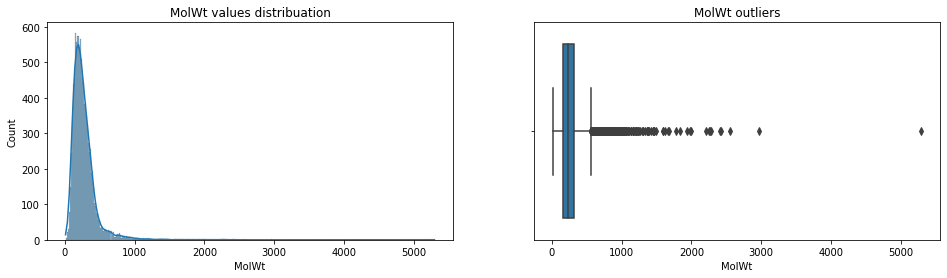

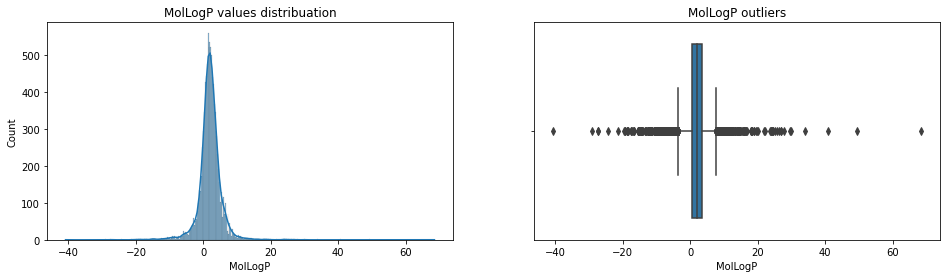

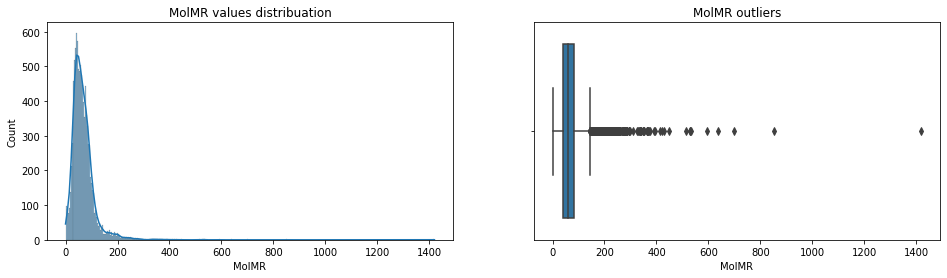

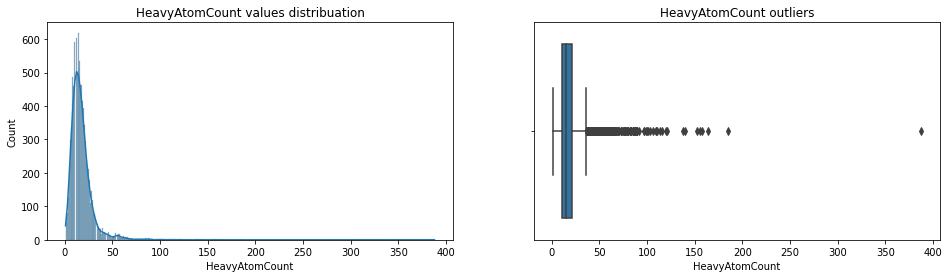

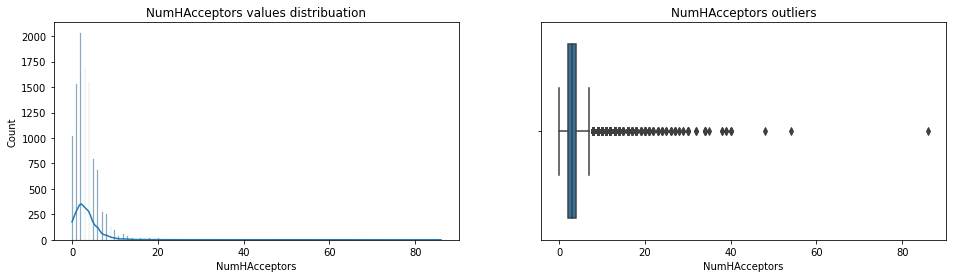

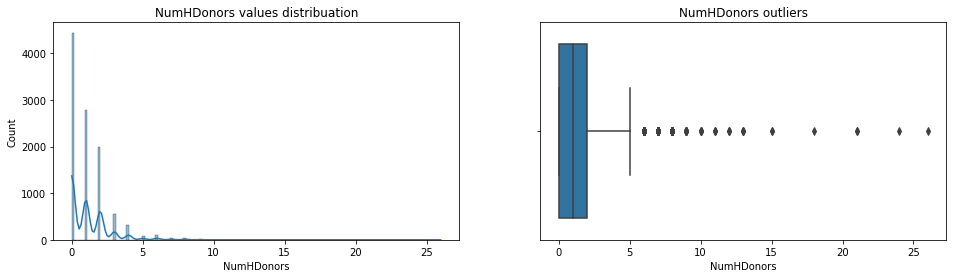

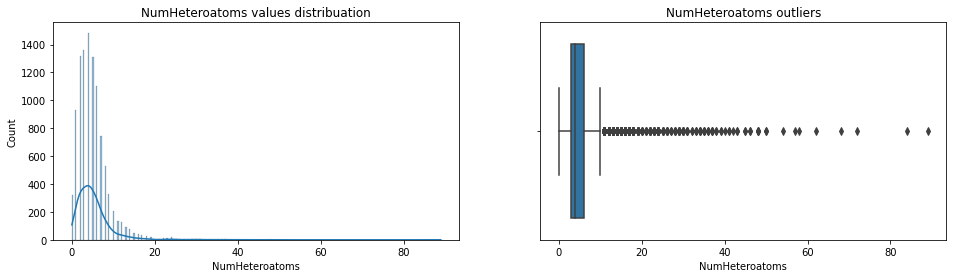

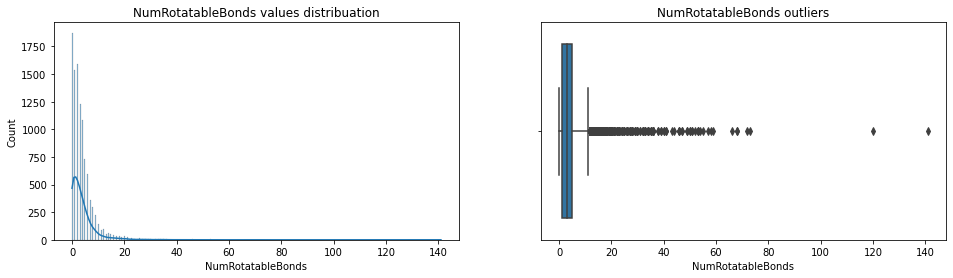

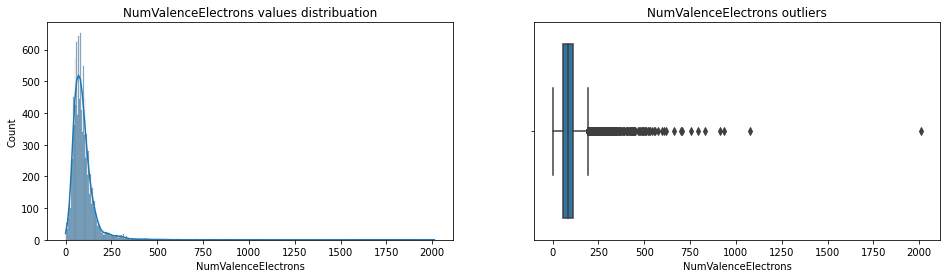

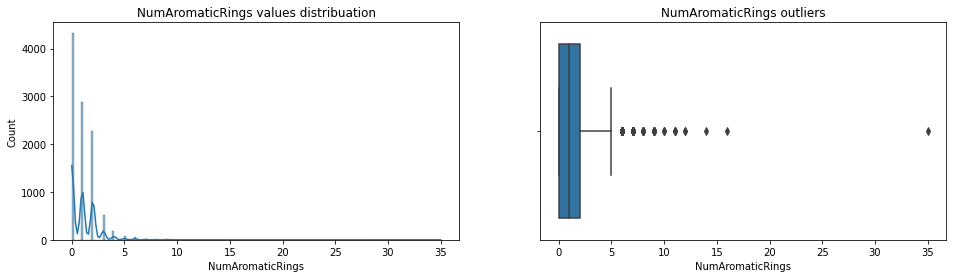

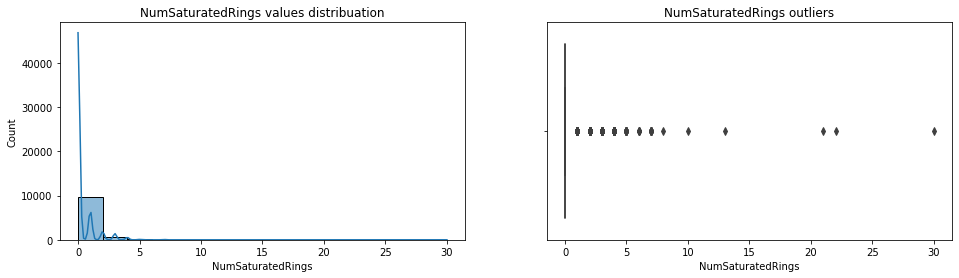

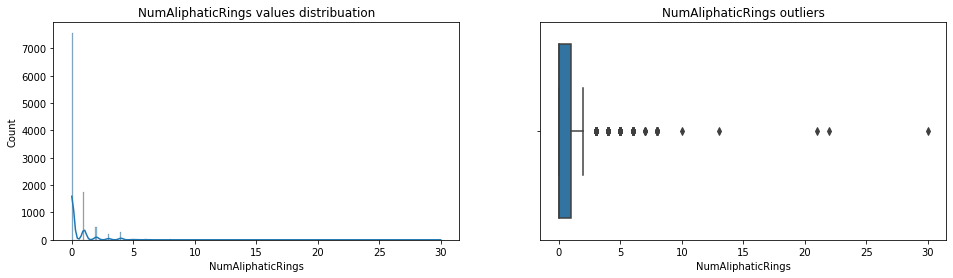

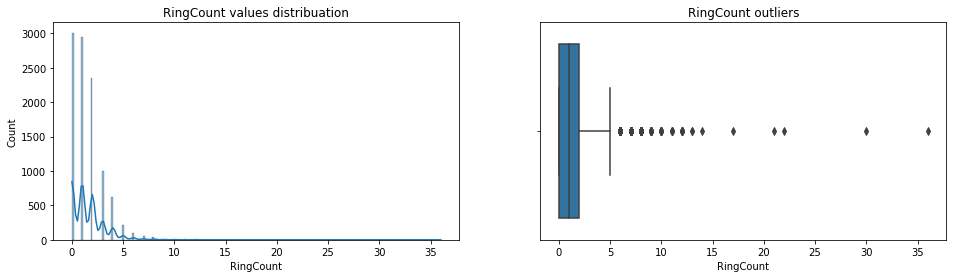

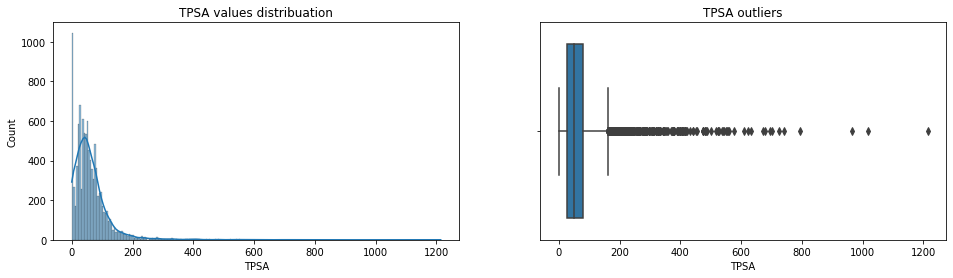

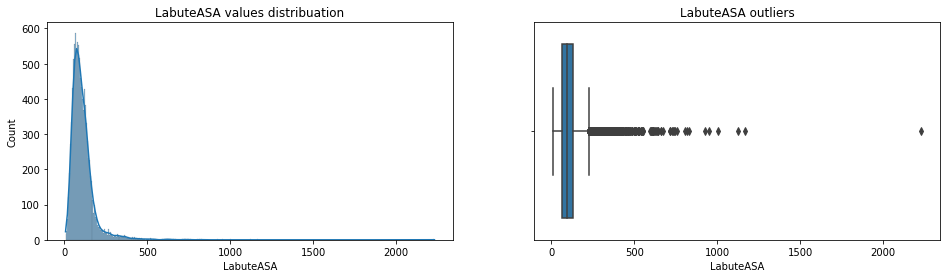

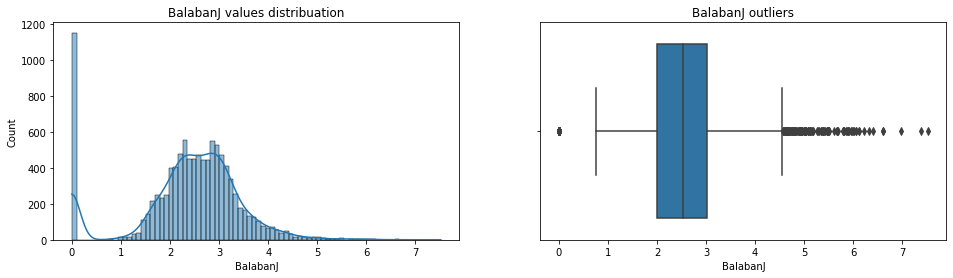

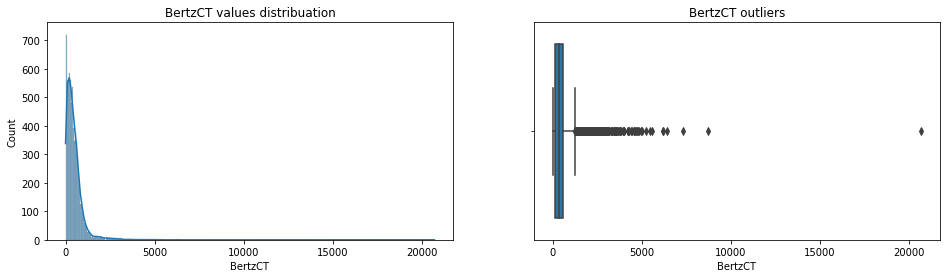

In [ ]:
for col in mega_DB.columns[2:]:
  show_outliers(mega_DB, col)
  print('\n')

## define the range of outliers using IQR method for a certain feature


In [ ]:
the_feature = 'MolWt'

Q1 = mega_DB[the_feature].quantile(0.25)
Q3 = mega_DB[the_feature].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# number of outliers for this feature

((mega_DB[the_feature] < (Q1 - 1.5 * IQR)) | (mega_DB[the_feature] > (Q3 + 1.5 * IQR))).sum()

494

In [ ]:
# show the rows with MolWt outliers

mega_DB[((mega_DB[the_feature] < (Q1 - 1.5 * IQR)) | (mega_DB[the_feature] > (Q3 + 1.5 * IQR)))]

,SMILES,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,756.226,8.11610,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
12,Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...,-1.980310,733.002,12.05424,225.4848,54.0,6.0,6.0,6.0,0.0,288.0,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,1804.418547
17,[Zn++].CCCCC(CC)CO[P]([S-])(=S)OCC(C)C.CCCCC(C...,-2.958195,660.282,9.32430,163.3960,35.0,8.0,0.0,11.0,20.0,208.0,0.0,0.0,0.0,0.0,36.92,251.870078,-5.688889e-07,523.642206
25,[Zn++].CCC(C)O[P]([S-])(=S)OC(C)CC(C)C.CCC(C)O...,-2.990877,604.174,8.04570,144.9800,31.0,8.0,0.0,11.0,14.0,184.0,0.0,0.0,0.0,0.0,36.92,226.410310,-4.900000e-07,495.309224
34,C[N+](C)(CCCN[S](=O)(=O)CCC(F)(F)C(F)(F)C(F)(F...,-4.057185,570.368,2.25110,88.6629,35.0,4.0,1.0,20.0,14.0,210.0,0.0,0.0,0.0,0.0,86.30,189.236600,5.464763e+00,857.405678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H...,-0.500000,585.608,-8.42420,131.4257,40.0,17.0,13.0,18.0,10.0,234.0,0.0,3.0,3.0,3.0,331.94,229.264540,1.847904e+00,815.054271
10215,C[C@@H]1O[C@H](O[C@H]2[C@H](C)O[C@H](O[C@H]3[C...,-4.080000,780.949,2.21810,192.6108,55.0,14.0,6.0,14.0,7.0,312.0,0.0,7.0,8.0,8.0,203.06,323.322425,8.374982e-01,1409.003742
10216,C[C@@H]1O[C@H](O[C@H]2[C@H](C)O[C@H](O[C@H]3[C...,-5.290000,764.950,3.24730,191.2210,54.0,13.0,5.0,13.0,7.0,306.0,0.0,7.0,8.0,8.0,182.83,318.528191,8.263084e-01,1374.417685
10221,COc1cc([C@H]2c3cc4c(cc3[C@H](O[C@H]3O[C@H]5CO[...,-3.570000,588.562,1.33860,138.3454,42.0,13.0,3.0,13.0,5.0,226.0,2.0,3.0,5.0,7.0,160.83,240.229488,1.318237e+00,1352.532560


In [ ]:
# create new df without these outliers

cured_megaDB = mega_DB[(mega_DB[the_feature] > (Q1 - 1.5 * IQR)) & (mega_DB[the_feature] < (Q3 + 1.5 * IQR))]

In [ ]:
cured_megaDB

,SMILES,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,392.510,3.95810,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,O=C1Nc2cccc3cccc1c23,-3.254767,169.183,2.40550,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,Clc1ccc(C=O)cc1,-2.177078,140.569,2.15250,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,422.525,2.48540,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
5,Cc1cccc(C=C)c1,-3.123150,118.179,2.63802,41.2700,9.0,0.0,0.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.00,55.836626,3.070761e+00,211.033225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10373,[H+].[Cl-].CN1CCCC(C1)CN2c3ccccc3Sc4ccccc24,-4.740000,346.927,1.74760,95.3460,23.0,3.0,0.0,4.0,2.0,122.0,2.0,1.0,2.0,4.0,6.48,150.312099,1.041666e-06,636.421293
10375,CCC(N)Cc1c[nH]c2ccccc12.CC(O)=O,-2.570000,248.326,2.53860,73.5789,18.0,2.0,3.0,4.0,3.0,98.0,2.0,0.0,0.0,2.0,79.11,106.813358,3.567857e-07,501.218230
10376,[Na+].[O-]C(=O)Cc1c(Cl)ccc(Cl)c1Cl,-3.080000,261.467,-1.05680,50.1830,14.0,2.0,0.0,6.0,2.0,70.0,1.0,0.0,0.0,1.0,40.13,118.440242,1.690000e-06,354.684783
10377,O.O.O.O.O.CN1CC[C@]23[C@H]4Oc5c(O)ccc(C[C@@H]1...,-3.280000,473.497,-3.57820,109.8230,31.0,6.0,4.0,14.0,0.0,182.0,1.0,1.0,4.0,5.0,285.03,178.236157,0.000000e+00,883.343327


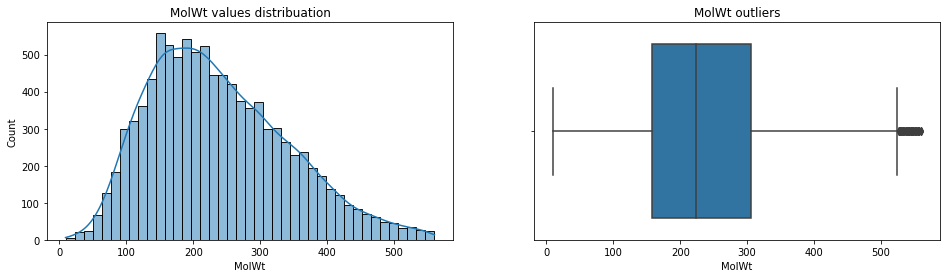

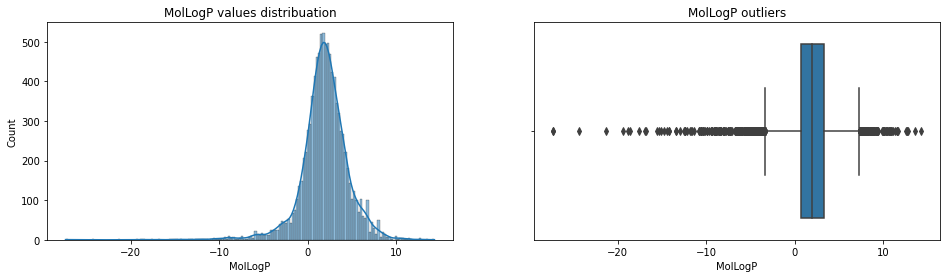

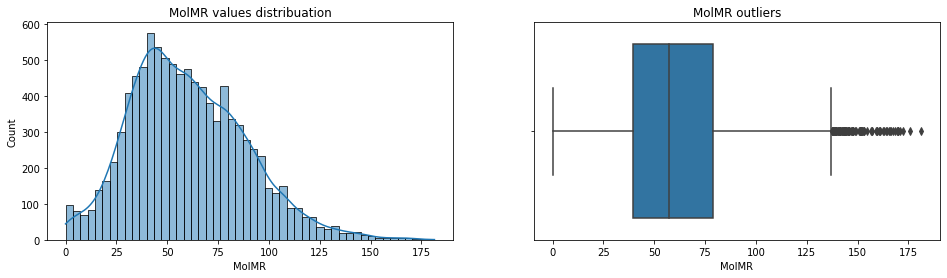

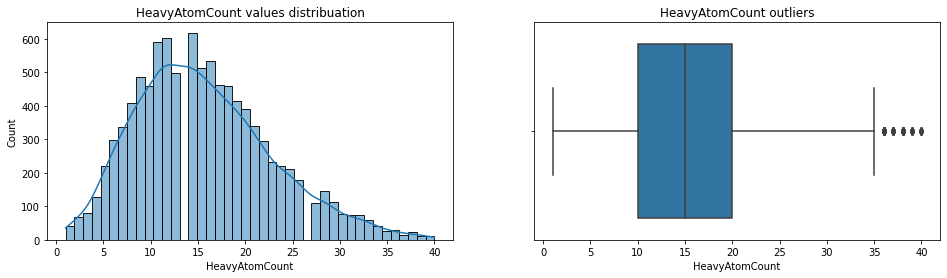

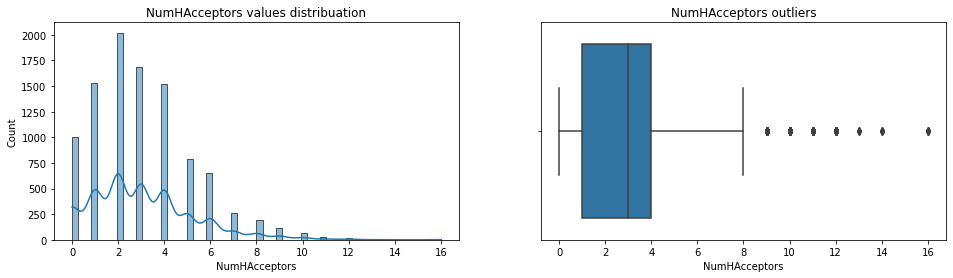

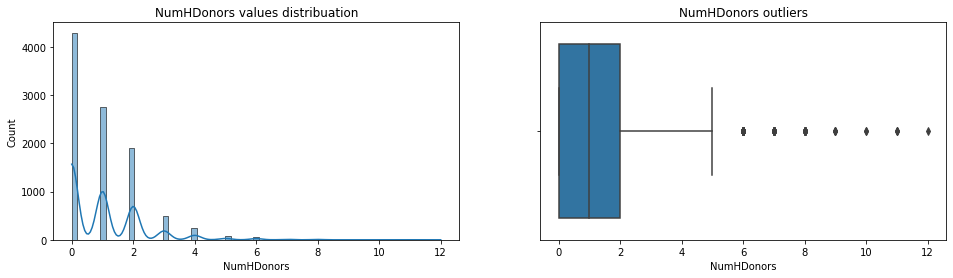

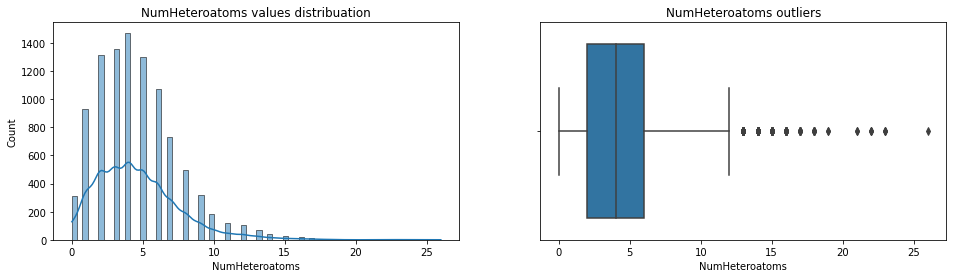

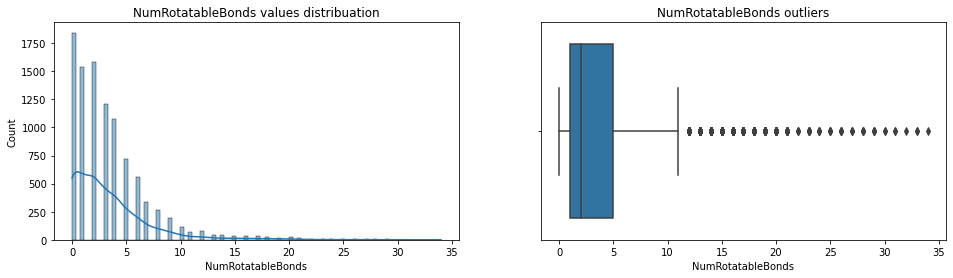

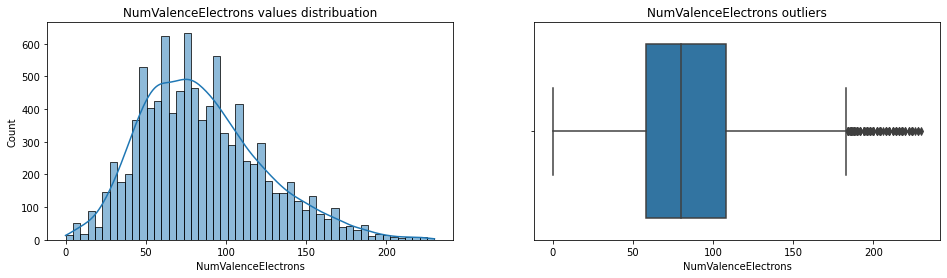

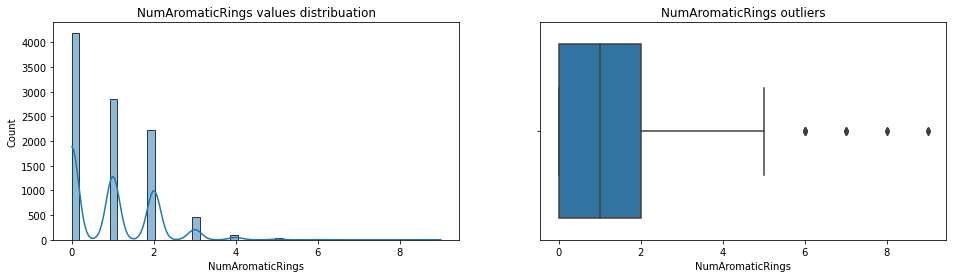

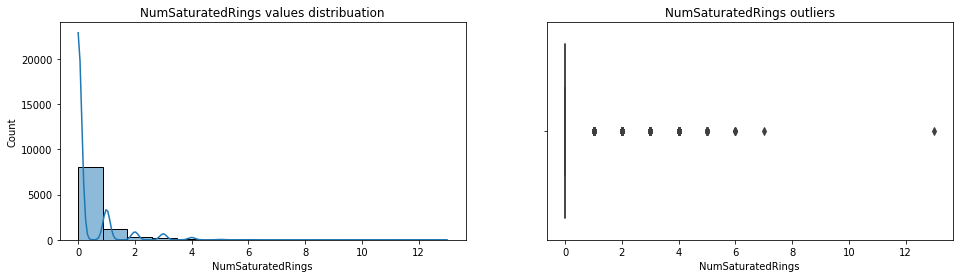

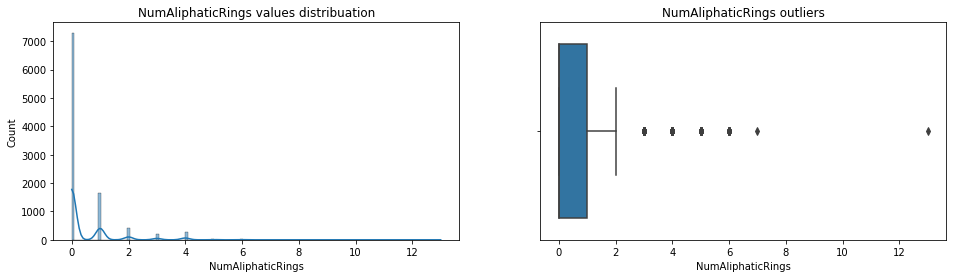

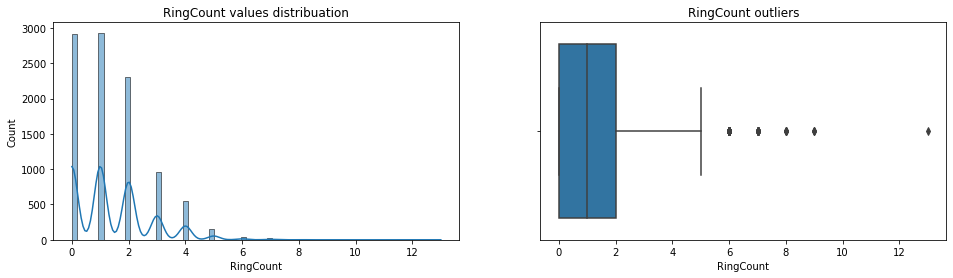

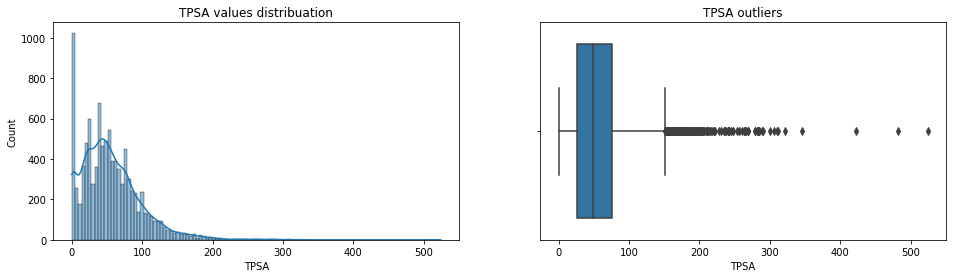

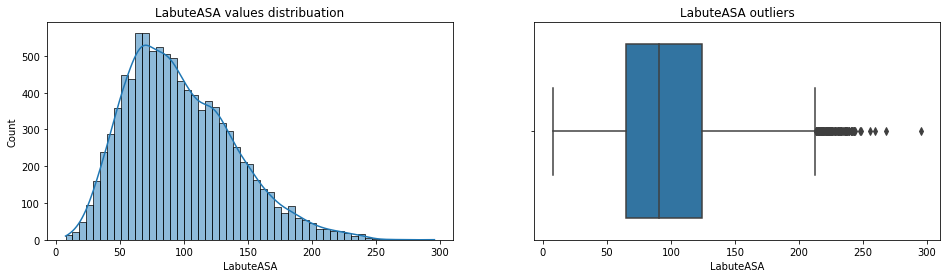

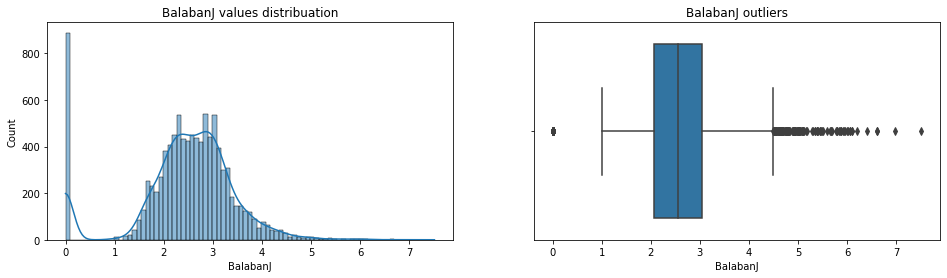

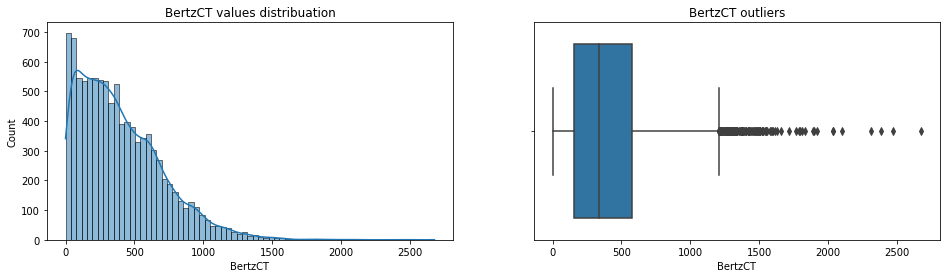

In [ ]:
for col in cured_megaDB.columns[2:]:
  show_outliers(cured_megaDB, col)
  print('\n')

# Applying Machine Learning Algorthims to train our model on the data

## Split my data to train and test datasets

In [ ]:
features = cured_megaDB.iloc[:,2:]

In [ ]:
features

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,392.510,3.95810,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,169.183,2.40550,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,140.569,2.15250,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
4,422.525,2.48540,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
5,118.179,2.63802,41.2700,9.0,0.0,0.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.00,55.836626,3.070761e+00,211.033225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10373,346.927,1.74760,95.3460,23.0,3.0,0.0,4.0,2.0,122.0,2.0,1.0,2.0,4.0,6.48,150.312099,1.041666e-06,636.421293
10375,248.326,2.53860,73.5789,18.0,2.0,3.0,4.0,3.0,98.0,2.0,0.0,0.0,2.0,79.11,106.813358,3.567857e-07,501.218230
10376,261.467,-1.05680,50.1830,14.0,2.0,0.0,6.0,2.0,70.0,1.0,0.0,0.0,1.0,40.13,118.440242,1.690000e-06,354.684783
10377,473.497,-3.57820,109.8230,31.0,6.0,4.0,14.0,0.0,182.0,1.0,1.0,4.0,5.0,285.03,178.236157,0.000000e+00,883.343327


In [ ]:
target = cured_megaDB.iloc[:,1]

In [ ]:
target

0       -3.616127
1       -3.254767
2       -2.177078
4       -4.662065
5       -3.123150
           ...   
10373   -4.740000
10375   -2.570000
10376   -3.080000
10377   -3.280000
10378   -3.850000
Name: Solubility, Length: 9885, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.75)

### Create a fuction to evaluate the models and save the scores in df

In [ ]:
score_df = pd.DataFrame(index=['R^2', 'MAE','RMSE'])
def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_df[f'{model}'] = [r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred))]
    
    return score_df



#### DecisionTreeRegressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

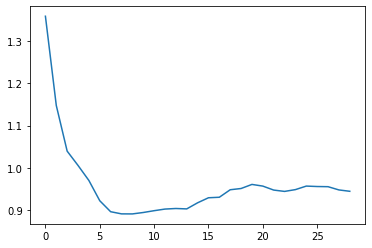

In [ ]:
score_list = []
best_DTR_model = None
best_dtr_score = float('inf')
for n in range (1,30):
  DTR_model = DecisionTreeRegressor(max_depth = n)
  DTR_model.fit(X_train, y_train)
  y_pred = DTR_model.predict(X_test)
  score = mean_absolute_error(y_pred, y_test)
  if score < best_dtr_score:
    best_dtr_score = score
    best_DTR_model = DTR_model
  score_list.append(score)

plt.plot(score_list)
plt.show()

In [ ]:
print(f"{best_DTR_model} with score equals {best_dtr_score}")

DecisionTreeRegressor(max_depth=9) with score equals 0.8910398487184593


In [ ]:
fit_and_evaluate(best_DTR_model)

,DecisionTreeRegressor(max_depth=9)
R^2,0.673424
MAE,0.895278
RMSE,1.321056


#### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr_model = KNeighborsRegressor()

In [ ]:
fit_and_evaluate(knr_model)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor()
R^2,0.673424,0.587667
MAE,0.895278,1.047323
RMSE,1.321056,1.484409


#### HistGradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
hgbr_model = HistGradientBoostingRegressor()

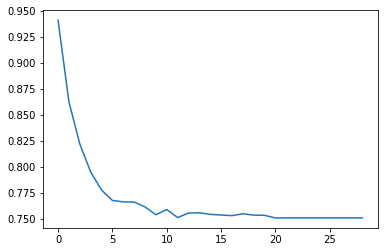

In [ ]:
score_list = []
best_hgbr_model = None
best_hgbr_score = float('inf')
for n in range (1,30):
  hgbr_model = HistGradientBoostingRegressor(max_depth=n)
  hgbr_model.fit(X_train, y_train)
  y_pred = hgbr_model.predict(X_test)
  score = mean_absolute_error(y_pred, y_test)
  if score < best_hgbr_score:
    best_hgbr_score = score
    best_hgbr_model = hgbr_model
  score_list.append(score)

plt.plot(score_list)
plt.show()

In [ ]:
print(f"{best_hgbr_model} with score equals {best_hgbr_score}")

HistGradientBoostingRegressor(max_depth=21) with score equals 0.7505786733751159


In [ ]:
fit_and_evaluate(best_hgbr_model)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21)
R^2,0.673424,0.587667,0.770382
MAE,0.895278,1.047323,0.750579
RMSE,1.321056,1.484409,1.107726


#### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr_model = RandomForestRegressor()

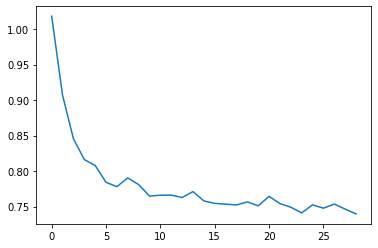

In [ ]:
score_list = []
best_rfr_model = None
best_rfr_score = float('inf')
for n in range (1,30):
  rfr_model = RandomForestRegressor(n_estimators=n)
  rfr_model.fit(X_train, y_train)
  y_pred = rfr_model.predict(X_test)
  score = mean_absolute_error(y_pred, y_test)
  if score < best_rfr_score:
    best_rfr_score = score
    best_rfr_model = rfr_model
  score_list.append(score)

plt.plot(score_list)
plt.show()

In [ ]:
print(f"{best_rfr_model} with score equals {best_rfr_score}")

RandomForestRegressor(n_estimators=29) with score equals 0.7396331193786719


In [ ]:
fit_and_evaluate(best_rfr_model)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21),RandomForestRegressor(n_estimators=29)
R^2,0.673424,0.587667,0.770382,0.758828
MAE,0.895278,1.047323,0.750579,0.751771
RMSE,1.321056,1.484409,1.107726,1.135253


#### SupportVectorRegression model

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()

In [ ]:
fit_and_evaluate(svr_model)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21),RandomForestRegressor(n_estimators=29),SVR()
R^2,0.673424,0.587667,0.770382,0.758828,0.538815
MAE,0.895278,1.047323,0.750579,0.751771,1.127907
RMSE,1.321056,1.484409,1.107726,1.135253,1.569883


#### LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
fit_and_evaluate(linreg_model)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21),RandomForestRegressor(n_estimators=29),SVR(),LinearRegression()
R^2,0.673424,0.587667,0.770382,0.758828,0.538815,0.618604
MAE,0.895278,1.047323,0.750579,0.751771,1.127907,1.039337
RMSE,1.321056,1.484409,1.107726,1.135253,1.569883,1.427636


#### Meta Estimator

In [ ]:
best_models = [('DTR', best_DTR_model), ('HGBR', best_hgbr_model), ('RFR', best_rfr_model)]

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
meta_vote = VotingRegressor(best_models)

In [ ]:
fit_and_evaluate(meta_vote)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21),RandomForestRegressor(n_estimators=29),SVR(),LinearRegression(),"VotingRegressor(estimators=[('DTR', DecisionTreeRegressor(max_depth=9)),\n ('HGBR',\n HistGradientBoostingRegressor(max_depth=21)),\n ('RFR', RandomForestRegressor(n_estimators=29))])"
R^2,0.673424,0.587667,0.770382,0.758828,0.538815,0.618604,0.758781
MAE,0.895278,1.047323,0.750579,0.751771,1.127907,1.039337,0.763511
RMSE,1.321056,1.484409,1.107726,1.135253,1.569883,1.427636,1.135365


In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
meta_stack = StackingRegressor(
    estimators=best_models, cv=10, n_jobs=-1
)

In [ ]:
fit_and_evaluate(meta_stack)

,DecisionTreeRegressor(max_depth=9),KNeighborsRegressor(),HistGradientBoostingRegressor(max_depth=21),RandomForestRegressor(n_estimators=29),SVR(),LinearRegression(),"VotingRegressor(estimators=[('DTR', DecisionTreeRegressor(max_depth=9)),\n ('HGBR',\n HistGradientBoostingRegressor(max_depth=21)),\n ('RFR', RandomForestRegressor(n_estimators=29))])","StackingRegressor(cv=10,\n estimators=[('DTR', DecisionTreeRegressor(max_depth=9)),\n ('HGBR',\n HistGradientBoostingRegressor(max_depth=21)),\n ('RFR', RandomForestRegressor(n_estimators=29))],\n n_jobs=-1)"
R^2,0.673424,0.587667,0.770382,0.758828,0.538815,0.618604,0.758781,0.775817
MAE,0.895278,1.047323,0.750579,0.751771,1.127907,1.039337,0.763511,0.731621
RMSE,1.321056,1.484409,1.107726,1.135253,1.569883,1.427636,1.135365,1.094537


In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.2 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd



def generate_descriptors(*smiles):
  descriptors = pd.DataFrame(columns=["MolWt","MolLogP","MolMR","HeavyAtomCount","NumHAcceptors","NumHDonors","NumHeteroatoms",
                 "NumRotatableBonds","NumValenceElectrons","NumAromaticRings","NumSaturatedRings",
                 "NumAliphaticRings","RingCount","TPSA","LabuteASA","BalabanJ","BertzCT"])
  
  for smile in smiles: 
    if Chem.MolFromSmiles(smile) is None:
      pass

    else:
        desc_MolWt = Descriptors.MolWt(Chem.MolFromSmiles(smile))
        desc_MolLogP = Descriptors.MolLogP(Chem.MolFromSmiles(smile))
        desc_MolMR = Descriptors.MolMR(Chem.MolFromSmiles(smile))
        desc_HeavyAtomCount = Descriptors.HeavyAtomCount(Chem.MolFromSmiles(smile))
        desc_NumHAcceptors = Descriptors.NumHAcceptors(Chem.MolFromSmiles(smile))
        desc_NumHDonors = Descriptors.NumHDonors(Chem.MolFromSmiles(smile))
        desc_NumHeteroatoms = Descriptors.NumHeteroatoms(Chem.MolFromSmiles(smile))
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(Chem.MolFromSmiles(smile))
        desc_NumValenceElectrons = Descriptors.NumValenceElectrons(Chem.MolFromSmiles(smile))           
        desc_NumAromaticRings = Descriptors.NumAromaticRings(Chem.MolFromSmiles(smile))      
        desc_NumSaturatedRings = Descriptors.NumSaturatedRings(Chem.MolFromSmiles(smile))      
        desc_NumAliphaticRings = Descriptors.NumAliphaticRings(Chem.MolFromSmiles(smile))
        desc_RingCount = Descriptors.RingCount(Chem.MolFromSmiles(smile))
        desc_TPSA = Descriptors.TPSA(Chem.MolFromSmiles(smile))
        desc_LabuteASA = Descriptors.LabuteASA(Chem.MolFromSmiles(smile))       
        desc_BalabanJ = Descriptors.BalabanJ(Chem.MolFromSmiles(smile))
        desc_BertzCT = Descriptors.BertzCT(Chem.MolFromSmiles(smile))
                
        row = [desc_MolWt,desc_MolLogP,desc_MolMR,desc_HeavyAtomCount,desc_NumHAcceptors,desc_NumHDonors,desc_NumHeteroatoms,
                        desc_NumRotatableBonds,desc_NumValenceElectrons,desc_NumAromaticRings,desc_NumSaturatedRings,
                        desc_NumAliphaticRings,desc_RingCount,desc_TPSA,desc_LabuteASA,desc_BalabanJ,desc_BertzCT]
        descriptors.loc[len(descriptors)] = row

  return descriptors

In [ ]:
generate_descriptors('CC(C)=CCCC(C)=CC(=O)', 'Oc1ccc(Cl)c(Cl)c1Cl')

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,152.237,2.8780,48.4860,11.0,1.0,0.0,1.0,4.0,62.0,0.0,0.0,0.0,0.0,17.07,68.806046,3.625760,171.311799
1,197.448,3.3524,43.1368,10.0,1.0,1.0,4.0,0.0,54.0,1.0,0.0,0.0,1.0,20.23,73.135436,3.342154,232.414996


In [ ]:
def compare_models(smiles):
  data = []
  i = 0
  for smile in smiles:
    svr = svr_model.predict(generate_descriptors([smile]))[0]
    #print(svr)

    linreg = linreg_model.predict(generate_descriptors([smile]))[0]
    #print(linreg)

    dtr = best_DTR_model.predict(generate_descriptors([smile]))[0]
    #print(dtr)

    metavote = meta_vote.predict(generate_descriptors([smile]))[0]

    metastack = meta_stack.predict(generate_descriptors([smile]))[0]


    row = [smile, svr, linreg, dtr, metavote, metastack]
    if i ==0:
      data = row
      i+=1
    else:
      data = np.vstack([data, row])
  if len(smiles) == 1:
    prediction = pd.DataFrame([data], columns=['Smiles','SVR', 'LinReg', 'BDTR', 'vote', 'stack'])
  else:
    prediction = pd.DataFrame(data, columns=['Smiles','SVR', 'LinReg', 'BDTR', 'vote', 'stack'])
  #prediction.set_index(smiles)
  return prediction
                            

In [ ]:
# Test the fuction that predict the soulbility with the models
smile = 'OCC(O)CO'
compare_models([smile])

,Smiles,SVR,LinReg,BDTR,vote,stack
0,OCC(O)CO,0.460767,0.647003,0.458114,0.732965,0.983418


# Save the models to google drive

In [ ]:
import joblib
import pickle

In [ ]:
# Save the stack model

joblib.dump(meta_stack, '/content/drive/MyDrive/WithNicolas/SoulPred/stack_model_joblib')

pickle.dump(meta_stack, open('/content/drive/MyDrive/WithNicolas/SoulPred/stack_model_pickle', 'wb'))


In [ ]:
# Save the vote model

joblib.dump(meta_vote, '/content/drive/MyDrive/WithNicolas/SoulPred/vote_model_joblib')

pickle.dump(meta_vote, open('/content/drive/MyDrive/WithNicolas/SoulPred/vote_model_pickle', 'wb'))


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'